# Analysis on Company's Profit Prediction

### In This Model, we are analyzing the profit for a Company by using it's Spend in R&D, Administration and Marketing in different States. For this, I am using the Regression Technique of Machine Learning.

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Data Collection

In [2]:
companies = pd.read_csv('1000_Companies.csv')

In [3]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
companies.shape

(1000, 5)

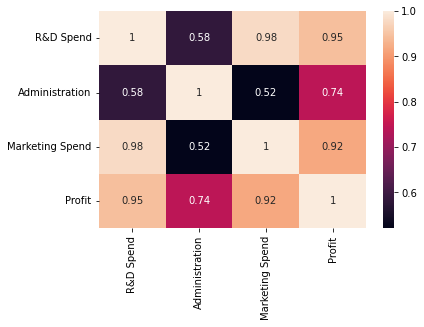

In [5]:
sns.heatmap(companies.corr(),annot=True)
plt.show()

In [6]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [7]:
companies_num = companies.drop(columns = 'State')

In [8]:
companies_num.mean()

R&D Spend           81668.927200
Administration     122963.897612
Marketing Spend    226205.058419
Profit             119546.164656
dtype: float64

## Data Analyzation

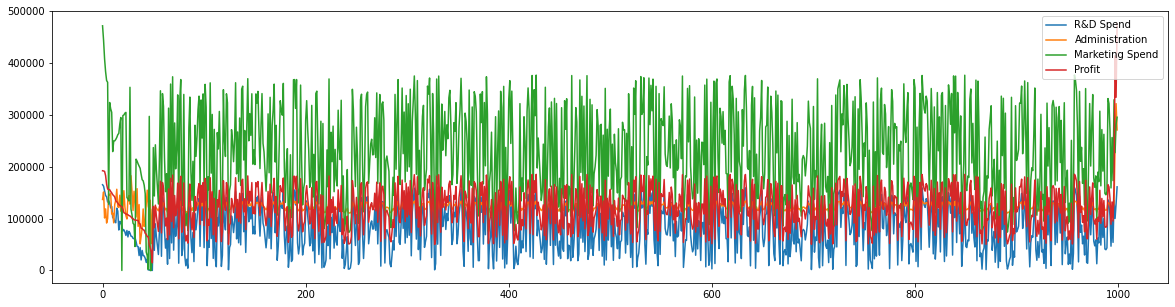

In [9]:
companies_num.plot(figsize=(20, 5))
plt.show()

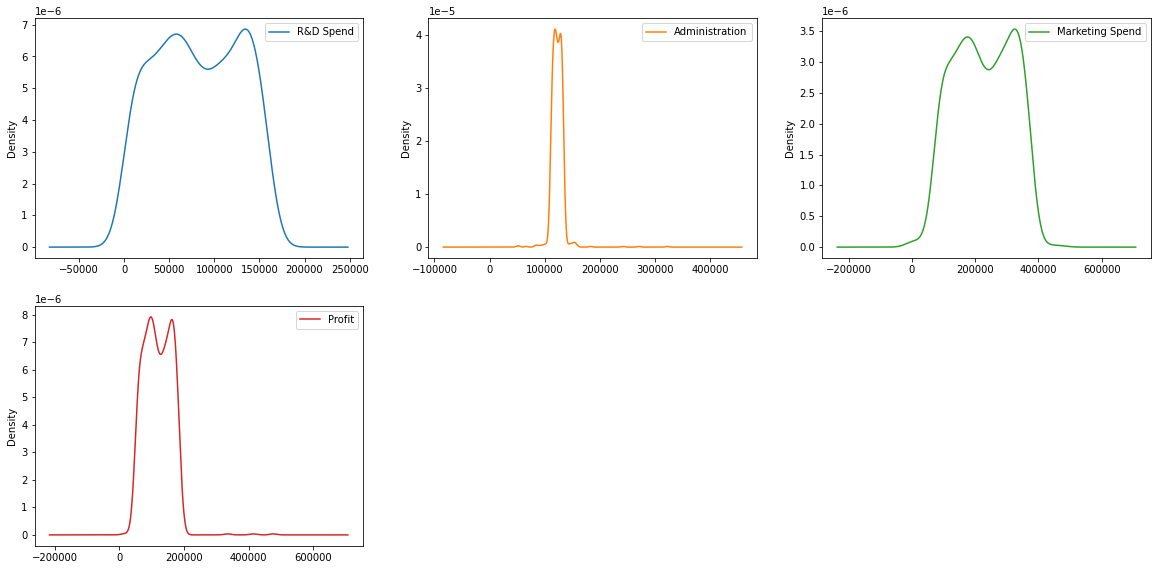

In [10]:
companies_num.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

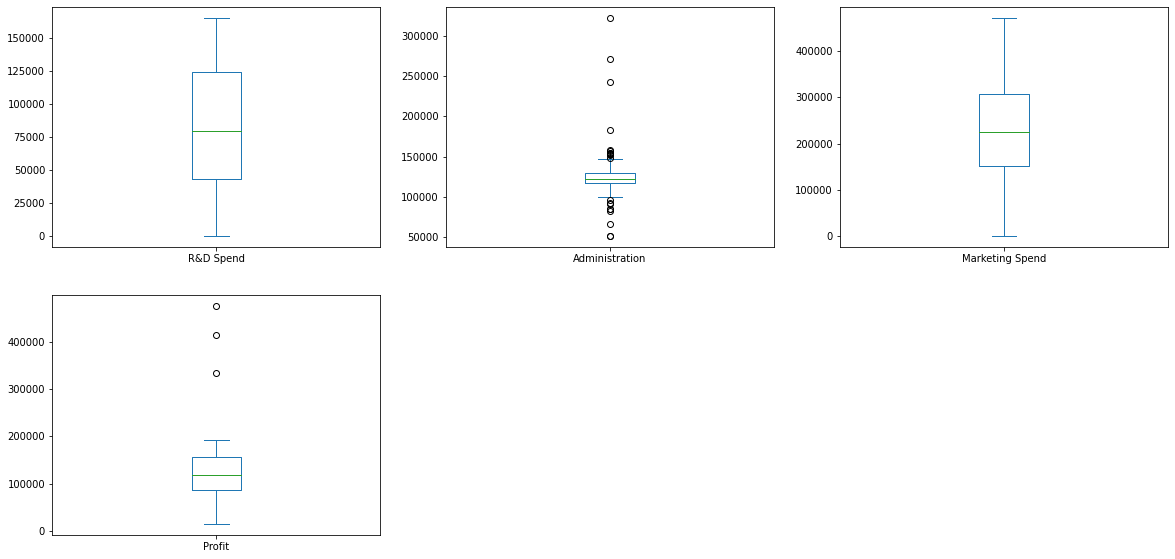

In [11]:
companies_num.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))
plt.show()

In [12]:
corr_analysis = companies_num.corr()
corr_analysis

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


### Note: Since, the correlation values between every label is strong. Thus this will lead to cause Multicollinearity. Hence, we will have to drop the higher most correlated label/column.

KEY TAKEAWAYS
1. A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
2. Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 
3. A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables

## Data Preprocessing

Label_and_Coding: Process to giving weightage to particluar fields


_Newyork = 1 , _California = 2 , _Florida = 3


This causes biased result towards florida bcoz of more value given to it
Hence we have to do One_Hot_Encoding


_Newyork = (1,0,0) , _California = (0,1,0) , _Florida = (0,0,1)

In [13]:
le = LabelEncoder()
data = companies

In [14]:
data['State'] = le.fit_transform(data['State'])

In [15]:
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder='passthrough')

In [16]:
data = np.array(columnTransformer.fit_transform(data),dtype=np.float64)

In [17]:
X = data[:,:-1]
y = data[:,-1]

In [18]:
print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0027547e+05 2.4192631e+05
  2.2714282e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2845623e+05 3.2165214e+05
  2.8169232e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6118172e+05 2.7093986e+05
  2.9544217e+05]]


In [19]:
print(y)

[192261.83    191792.06    191050.39    182901.99    166187.94
 156991.12    156122.51    155752.6     152211.77    149759.96
 146121.95    144259.4     141585.52    134307.35    132602.65
 129917.04    126992.93    125370.37    124266.9     122776.86
 118474.03    111313.02    110352.25    108733.99    108552.04
 107404.34    105733.54    105008.31    103282.38    101004.64
  99937.59     97483.56     97427.84     96778.92     96712.8
  96479.51     90708.19     89949.14     81229.06     81005.76
  78239.91     77798.83     71498.49     69758.98     65200.33
  64926.08     49490.75     42559.73     35673.41     14681.4
 123485.2464   82155.48418 125867.0108  104976.1696   89803.10053
  75297.23305 114284.5283  171985.0761   72337.96774 169566.5772
 158670.9451  114522.8756   85842.60573 101106.2297   59328.81874
 157142.6178   68669.64059 177717.3712   94409.4396  183945.1553
  82484.38635 144515.3371  105333.2634  122331.0988  168459.4156
  60947.70089 162733.9549  181574.4968   7357

## Data Training and Testing 

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(x_test)

In [24]:
print("Coefficient = ",lr.coef_)
print("Intercept = ",lr.intercept_)

Coefficient =  [ 4.46921768e+02 -3.42694235e+02 -1.04227533e+02  5.26047095e-01
  9.78530820e-01  9.80946128e-02]
Intercept =  -66123.76082362703


## Model Accuracy Evaluation

In [25]:
#Finding Coefficient of Determination
r2 = r2_score(y_test,y_pred)
print('Coefficient of Determination: ',r2)

Coefficient of Determination:  0.931112023626835


In [26]:
#Finding Correlation Coefficient
r = r2**(0.5)
print('Correlation Coefficient: ',r)

Correlation Coefficient:  0.9649414612435487


# Performing Modelling with handling Multicollinearity

## Data Preprocessing

In [27]:
corr_analysis = companies_num.corr()
corr_analysis

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


Since, from the above result, 'R&D Spend' is highly correlated with 'Administration' & 'Marketing Spend'.
So we will drop one column for our input data, i.e. 'Marketing Spend', remaining columns will be our x_labels and 'Profit' will be our output data as y_label.

Why did we drop 'Marketing Spend'?
--> It is because the 'R&D Spend' is highly correlated with 'Marketing Spend' (corr = 0.94)

In [28]:
df = pd.DataFrame(data)

In [29]:
X = companies[['R&D Spend','Administration']]
y = companies['Profit']

## Data Training and Testing

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=lr.predict(x_test)

In [34]:
print("Coefficient = ",lr.coef_)
print("Intercept = ",lr.intercept_)

Coefficient =  [0.72620044 0.90205365]
Intercept =  -50908.53791012036


## Model Accuracy Evaluation after handling Multicollinearity

In [35]:
#Finding Coefficient of Determination
r2_2 = r2_score(y_test,y_pred)
print('Coefficient of Determination: ',r2_2)

Coefficient of Determination:  0.9312577287934511


In [36]:
#Finding Correlation Coefficient
r_2 = r2_2**(0.5)
print('Correlation Coefficient: ',r_2)

Correlation Coefficient:  0.9650169577750699


# Conclusion (Before vs After Multicollinearity Handling)

Here, after dropping one column of 'Marketing Spend', we are getting improvement in our Accuracy Results.

In [37]:
#Before handling Multicollinearity

print("Accuracy Before : ",r2*100)

Accuracy Before :  93.1112023626835


In [38]:
#After handling Multicollinearity

print("Accuracy After : ",r2_2*100)

Accuracy After :  93.12577287934512
